<a href="https://colab.research.google.com/github/Narachii/tensorflow_basics/blob/LSTM_models/LSTM_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Flatten, GlobalMaxPool1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [9]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_tarin, x_test = x_train / 255.0, x_test / 255.0
print('x_train.shpae', x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shpae (60000, 28, 28)


In [14]:
# Build the model
i = Input(shape=(x_train[0].shape))
x = LSTM(128)(i)
# x = LSTM(128, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

r = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3363 - accuracy: 0.8918 - val_loss: 0.1446 - val_accuracy: 0.9557
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1022 - accuracy: 0.9687 - val_loss: 0.0697 - val_accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0710 - accuracy: 0.9787 - val_loss: 0.0883 - val_accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0555 - accuracy: 0.9837 - val_loss: 0.0634 - val_accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0435 - accuracy: 0.9869 - val_loss: 0.0585 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0379 - accuracy: 0.9887 - val_loss: 0.0514 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0472 - val_accuracy:

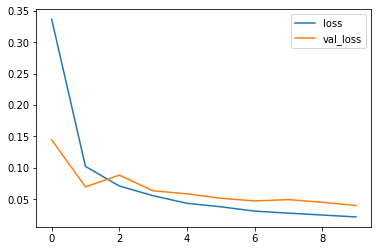

In [15]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

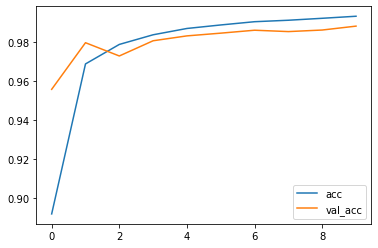

In [16]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 971    0    0    0    0    1    6    2    0    0]
 [   0 1133    0    0    0    1    1    0    0    0]
 [   2    4 1017    2    0    0    1    3    2    1]
 [   0    1    2  998    0    3    0    4    2    0]
 [   0    0    0    0  972    0    2    0    2    6]
 [   2    1    0    7    1  878    1    0    2    0]
 [   0    2    0    1    1    3  951    0    0    0]
 [   0    4    3    0    1    0    1 1015    0    4]
 [   2    0    2    4    1    2    0    1  960    2]
 [   0    0    0    0    8    9    0    4    2  986]]


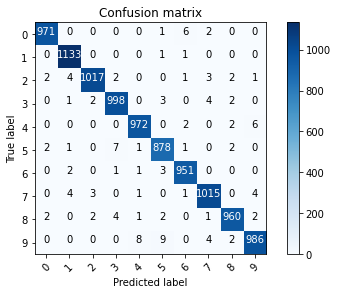

In [17]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

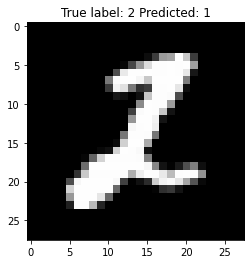

In [18]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));